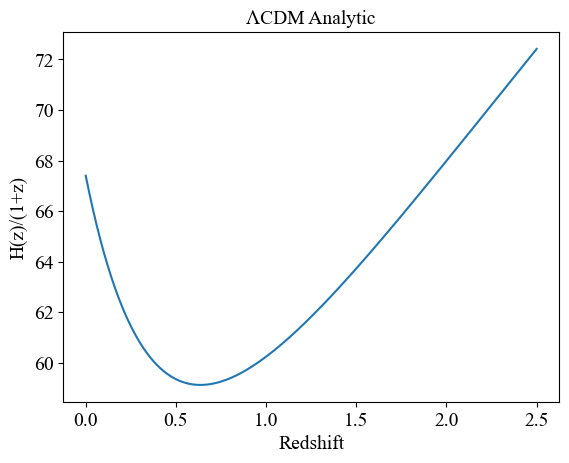

With No Mergers, Values at z = 0: 
Omega_m: 
0.3121973851075922
Omega_r: 
9.061444030764565e-05
Omega_Lambda: 
0.6877120004521003
Hubble Constant (km/(sec Mpc)): 
67.33669798854245
Total Energy Density: 
8.515055045326903e-27
 


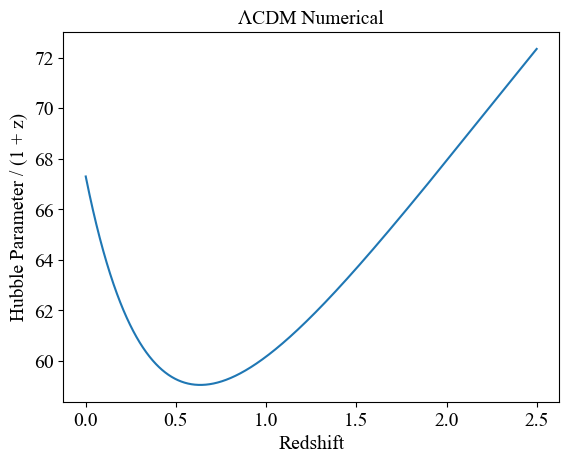

In [ ]:
"""
Here we compute H(z) for Lambda-CDM numerically and analytically. We see there is an excellent match.
One could use more sophisticated methods for numerically integrating the differential equations, though
since the match to the analytic case is good, this complication is not necessary. 
"""

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

MetersPerParsec = 3.086*(10**(16))
MetersPerGpc = (10**9)*MetersPerParsec
MetersPerMpc = (10**6)*MetersPerParsec
SecondsperYear=365*24*60*60
SMBHBinaryMass=2*(10**7) #Solar Masses
KgperSolarMass = 1.989*(10**(30))
SMBHBinaryMass = SMBHBinaryMass*KgperSolarMass #now in kg 
c = 299792458 #m/s
G = 6.6743*(10**(-11)) # m^3 kg^−1 s^−2
Epsilon = 0.08 #Fraction of mass converted to gravitational waves 
H0UnitConversion = 1000/(MetersPerParsec*1000000)

h = 0.674
H0 = 100 * h           # km/s/Mpc
H0_SI = H0 * H0UnitConversion  # s^-1
rho_crit_0 = 3 * H0_SI**2 / (8 * np.pi * G)  # Critical density today, kg/m^3
Omega_r0 = 4.15e-5 / h**2  # Radiation density parameter (photons + neutrinos), from Dodelson 
Omega_m0 = 0.14241 / h**2 # Matter density parameter 
Omega_Lambda0 = 1 - Omega_m0 - Omega_r0 #Sets flatness 

#Analytic computation 
z_vals = np.linspace(0, 2.5, 1000)
Hz_vals = [H0 * np.sqrt(Omega_m0*(1+z)**3 + Omega_r0*(1+z)**4 + Omega_Lambda0) for z in z_vals]
Hz1pz = [H/(1+z) for H,z in zip(Hz_vals, z_vals)] #Dividing H(z) by 1+z for plotting. This has been done in the literature before. 

plt.plot(z_vals, Hz1pz)
plt.title('ΛCDM Analytic')
plt.xlabel("Redshift")
plt.ylabel("H(z)/(1+z)")
plt.show()

# Friedman Equation 
def H(z, rho_m, rho_r, rho_Lambda):
    rho_total = rho_m + rho_r + rho_Lambda
    return math.sqrt((8*math.pi*G/3)*(rho_total))

def RhoCritical(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return 3*Hval*Hval/(8*math.pi*G) 

#Returns drho_r / dz 
def drhordz(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return (-1/(Hval*(1+z)))*(-4*Hval*rho_r)

#Returns drho_m / dz 
def drhomdz(z, rho_m, rho_r, rho_Lambda):
    Hval=H(z, rho_m, rho_r, rho_Lambda)
    return (1/(Hval*(1+z)))*(3*Hval*rho_m)

#Setting initial conditions (at z = 1090)
rho_Lambda = Omega_Lambda0*rho_crit_0 #physical energy density is constant for cosmological constant
rho_r = Omega_r0*rho_crit_0*(1+1090)**4
rho_m = Omega_m0*rho_crit_0*(1+1090)**3
z = 1090 #Redshift at CMB formation 
dz = -0.001
HList_No_Mergers=[]
zList_No_Mergers=[]
#Euler's method, using it bc it is simple 
while z>0:
    rho_r_old = rho_r
    rho_m_old = rho_m 
    rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda)
    rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda)
    HList_No_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
    zList_No_Mergers.append(z)
    z = z + dz
    
RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
Omega_m=rho_m/RhoCrit
Omega_r=rho_r/RhoCrit    
print("With No Mergers, Values at z = 0: ")
print("Omega_m: ")
print(Omega_m)
print("Omega_r: ")
print(Omega_r)
print("Omega_Lambda: ")
print(rho_Lambda/RhoCrit)
H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion
print("Hubble Constant (km/(sec Mpc)): ")
print(H0New)
print("Total Energy Density: ")
print(rho_r + rho_m + rho_Lambda)
print(" ")

H1pzList_No_Mergers=[]
for index in range(len(HList_No_Mergers)):
    H1pzList_No_Mergers.append(HList_No_Mergers[index]/(1+zList_No_Mergers[index]))
    
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1])
plt.title("ΛCDM Numerical")
plt.xlabel("Redshift")
plt.ylabel("Hubble Parameter / (1 + z)")
plt.show()

In [ ]:
import numpy as np
#This is used to set initial conditions (densities at z = 1090).

def InitialConditions(h):
    # Constants
    c = 299792458          # m/s
    G = 6.67430e-11       # m^3 kg^-1 s^-2
    MetersPerMpc = 3.086e22  # meters per Mpc
    z_rec = 1090          # Redshift at recombination

    # Derived parameters
    H0 = 100 * h           # km/s/Mpc
    H0_SI = H0 * 1000 / MetersPerMpc  # s^-1
    rho_crit_0 = 3 * H0_SI**2 / (8 * np.pi * G)  # Critical density today, kg/m^3
    Omega_r = 4.15e-5 / h**2  # Radiation density parameter (photons + neutrinos), from Dodelson 
    Omega_m = 0.14241/h**2
    Omega_Lambda = 1.0 - Omega_m - Omega_r  # Dark energy density for flatness 

    # Density parameters at z=1090
    rho_m_initial = Omega_m * rho_crit_0 * (1 + z_rec)**3  # Total matter density
    rho_r_initial = Omega_r * rho_crit_0 * (1 + z_rec)**4  # Radiation density
    rho_Lambda_initial = Omega_Lambda * rho_crit_0  # Dark energy density, is constant with redshift 
    return rho_m_initial, rho_r_initial, rho_Lambda_initial

We pass a value of h to set initial conditions. 

We have:

$H_0 = 100 h$

We then convert $H_0$ to units of $sec^{-1}$.

$\rho_{CRIT_0} = \frac{3 H_0^2}{8 \pi G}$

$\Omega_r = 0.0000415 / h^2$

$\Omega_m = 0.14241 / h^2$

To impose flatness: 

$\Omega_\Lambda = 1 - \Omega_m - \Omega_r$

Initial densities, at $z = 1090$:

$\rho_{m} = \Omega_{m} \rho_{CRIT_0} (1 + z_{RECOMBINATION})^3$

$\rho_{r} = \Omega_{r} \rho_{CRIT_0} (1 + z_{RECOMBINATION})^4$

$\rho_{\Lambda} = \Omega_{\Lambda} \rho_{CRIT_0} $

We integrate from $z = 1090$ to $z = 0$.

In [4]:
from matplotlib import font_manager


for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
    if 'Urbanist'.lower() in fontpath.lower():
        print(fontpath)

from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = "/home/hoelsczj/Library/static/"

# get normal font and store it in `urbanist-Light`
font_path = personal_path + "Urbanist-Regular.ttf"
font_manager.fontManager.addfont(font_path)
urbanist= FontProperties(fname=font_path)

# get bold font and store it in `urbanist_bold`
font_path = personal_path + "Urbanist-Bold.ttf"
font_manager.fontManager.addfont(font_path)
urbanist_bold = FontProperties(fname=font_path)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = urbanist.get_name()
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', family="urbanist", size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, lw=2)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rcParams['xtick.minor.width']=2   
plt.rcParams['xtick.major.width']=2 
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from pyfonts import load_google_font
from pypalettes import load_cmap
import pandas as pd
cmap = load_cmap("PurpleGreens")

/tmp/ipykernel_41955/3397341286.py:41: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

def WithMergers(h_sample, Rate):
    # Constants
    c = 299792458  # m/s
    G = 6.67430e-11  # m^3 kg^-1 s^-2
    MetersPerParsec = 3.086e16  # meters per parsec
    MetersPerMpc = 1e6 * MetersPerParsec  # meters per Mpc
    H0UnitConversion = 1000 / (MetersPerMpc)
    MetersPerGpc = (10**9)*MetersPerParsec
    SecondsperYear=365*24*60*60
    SMBHBinaryMass=2*(10**7) #Solar Masses
    KgperSolarMass = 1.989*(10**(30))
    SMBHBinaryMass = SMBHBinaryMass*KgperSolarMass #now in kg 
    Epsilon = 0.08 #Fraction of mass that is converted to gravitational waves

    #This is a simple step function merger rate that starts at redshift = 10 
    def RSMBHComoving(z, Rate):
        if z>10:
            return 0
        else:
            return Rate*(1/MetersPerGpc**3)*(1/SecondsperYear) #Converts to units of m^-3 sec^-1

    # Friedman Equation 
    def H(z, rho_m, rho_r, rho_Lambda):
        rho_total = rho_m + rho_r + rho_Lambda
        return math.sqrt((8*math.pi*G/3)*(rho_total))

    def RhoCritical(z, rho_m, rho_r, rho_Lambda):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return 3*Hval*Hval/(8*math.pi*G) 
    
    #Returns drho_r / dz 
    def drhordz(z, rho_m, rho_r, rho_Lambda, Rate):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-4*Hval*rho_r + RSMBHComoving(z, Rate)*((1+z)**3)*Epsilon*SMBHBinaryMass)
    
    #Returns drho_m / dz 
    def drhomdz(z, rho_m, rho_r, rho_Lambda, Rate):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (1/(Hval*(1+z)))*(3*Hval*rho_m + RSMBHComoving(z, Rate)*((1+z)**3)*Epsilon*SMBHBinaryMass)
    
    rho_m, rho_r, rho_Lambda = InitialConditions(h_sample) #Obtaining densities at z = 1090 
    z = 1090 #Redshift at CMB formation 
    dz = -0.001
    HList_Mergers=[]
    zList_Mergers=[]
    #Euler's method, using it bc it is simple 
    while z>0:
        rho_r_old = rho_r
        rho_m_old = rho_m 
        #Stuff below is to forbid negative rho_m
        if (rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)) > 0:
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)
            rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)
        else:
            rho_m = 0
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, 0)
        HList_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
        zList_Mergers.append(z)
        z = z + dz

    RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
    Omega_m=rho_m/RhoCrit
    Omega_r=rho_r/RhoCrit 
   
    H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion
   
    H1pzList_Mergers=[] #Dividing H by 1+z, useful for plotting later. 
    for index in range(len(HList_Mergers)):
        H1pzList_Mergers.append(HList_Mergers[index]/(1+zList_Mergers[index]))

    #Here I apply a cubic spline interpolation, useful for plotting things.
    import scipy
    Interpolated_H = scipy.interpolate.CubicSpline(np.flip(zList_Mergers), np.flip(HList_Mergers), axis=0, extrapolate=None)

    return zList_Mergers, H0New, H1pzList_Mergers, Interpolated_H

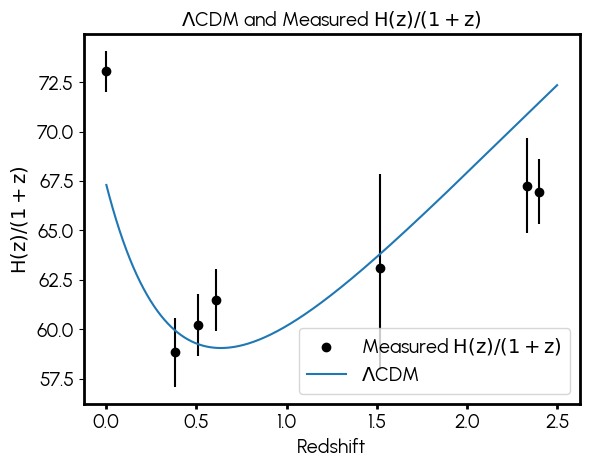

In [ ]:
#Here we have measured values for H(z), with upper and lower error bars. 
H_Measured = np.array([73.04, 81.2, 90.9, 99, 159, 224, 227.6]) #Hubble parameter, km / (sec Mpc)
H_Measured_Uncertainty_Upper = np.array([1.04, 2.42, 2.37, 2.51, 12, 8, 5.74])
H_Measured_Uncertainty_Lower = np.array([1.04, 2.42, 2.37, 2.51, 13, 8, 5.47])
H_Measured_Redshift = np.array([0, 0.38, 0.51, 0.61, 1.52, 2.33, 2.4]) #Redshifts for the values of H

#This is so we can plot things as H(z) / (1+z) :
H_Measured_1pz = []
H_Measured_Uncertainty_Upper_1pz = []
H_Measured_Uncertainty_Lower_1pz = []
for index in range(len(H_Measured)):
    H_Measured_1pz.append(H_Measured[index]/(1+H_Measured_Redshift[index]))
    H_Measured_Uncertainty_Upper_1pz.append(H_Measured_Uncertainty_Upper[index]/(1+H_Measured_Redshift[index]))
    H_Measured_Uncertainty_Lower_1pz.append(H_Measured_Uncertainty_Lower[index]/(1+H_Measured_Redshift[index]))

H_Measured_1pz = np.array(H_Measured_1pz) #Divided by (1+z)
H_Measured_Uncertainty_Upper_1pz = np.array(H_Measured_Uncertainty_Upper_1pz)
H_Measured_Uncertainty_Lower_1pz = np.array(H_Measured_Uncertainty_Lower_1pz)

plt.scatter(H_Measured_Redshift, H_Measured_1pz, color='k', label=r'Measured $\rm{H}(z)/(1+z)$')
plt.vlines(x = H_Measured_Redshift, ymin = H_Measured_1pz - H_Measured_Uncertainty_Lower_1pz, ymax = H_Measured_1pz + H_Measured_Uncertainty_Upper_1pz, colors = 'black')
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1], label=r'$Λ$CDM')
plt.title(r'$\Lambda$CDM and Measured $\rm{H}(z)/(1+z)$')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{H}(z)/(1+z)$')
plt.legend()



In [ ]:
#Computes chi^2, which we minimize in fits. 
def ChiSqr(h_sample, Rate):
    Output = WithMergers(h_sample, Rate)[3]
    H_With_Mergers = Output(H_Measured_Redshift)
    #This is to handle the two values for H that have slightly different upper and lower error bars. 
    H_Measured_Uncertainty = H_Measured_Uncertainty_Upper
    if Output(1.52) > 159:
        H_Measured_Uncertainty[4] = H_Measured_Uncertainty_Upper[4]
    else:
        H_Measured_Uncertainty[4] = H_Measured_Uncertainty_Lower[4]
    if Output(2.4) > 227.6:
        H_Measured_Uncertainty[6] = H_Measured_Uncertainty_Upper[6]
    else:
        H_Measured_Uncertainty[6] = H_Measured_Uncertainty_Lower[6]
    Chisquare = np.sum(((H_With_Mergers - H_Measured)**2) / H_Measured_Uncertainty**2)
    return Chisquare

In [ ]:
#Here we do a brute force grid search, to set initial values for the parameter-fitting algorithm. 

RateList = np.linspace(0, 10000, 100)
hList = np.linspace(0.5, 1, 20)

ChiSqrVal = 999999999
for element1 in RateList:
    print(element1) #Printing this so I know how far along it is. Feel free to delete this, if you wish. 
    for element2 in hList:
        ChiSqrValNew = ChiSqr(element2, element1)
        if ChiSqrValNew < ChiSqrVal:
            ChiSqrVal = ChiSqrValNew
            hfitted = element2
            Ratefitted = element1 

0.0
101.01010101010101
202.02020202020202
303.030303030303
404.04040404040404
505.0505050505051
606.060606060606
707.070707070707
808.0808080808081
909.0909090909091
1010.1010101010102
1111.111111111111
1212.121212121212
1313.1313131313132
1414.141414141414
1515.1515151515152
1616.1616161616162
1717.171717171717
1818.1818181818182
1919.1919191919192
2020.2020202020203
2121.212121212121
2222.222222222222
2323.2323232323233
2424.242424242424
2525.252525252525
2626.2626262626263
2727.2727272727275
2828.282828282828
2929.2929292929293
3030.3030303030305
3131.313131313131
3232.3232323232323
3333.3333333333335
3434.343434343434
3535.3535353535353
3636.3636363636365
3737.373737373737
3838.3838383838383
3939.3939393939395
4040.4040404040406
4141.414141414141
4242.424242424242
4343.434343434344
4444.444444444444
4545.454545454545
4646.464646464647
4747.474747474747
4848.484848484848
4949.49494949495
5050.50505050505
5151.515151515152
5252.525252525253
5353.535353535353
5454.545454545455
5555.55

In [ ]:
from scipy.optimize import minimize
import scipy 

# Wrap ChiSqr to accept a single list of parameters
def ChiSqr_wrapped(params):
    h_sample, Rate = params
    return ChiSqr(h_sample, Rate)

params1 = (0.68, 0)
print('Chi Squared for ΛCDM: ')
print(ChiSqr_wrapped(params1))
print(" ")

# Initial guesses for [h, Rate]
initial_guess = [hfitted, Ratefitted] 

#Add bounds
bounds = [(0.5, 1), (0.0, 100000)]

# Run minimization
result = scipy.optimize.minimize(ChiSqr_wrapped, initial_guess, bounds=bounds)

# Print results
print("Best-Fit Parameters With Mergers:")
print("h = ", result.x[0])
print("Merger Rate per (Gpc^3 yr) = ", result.x[1])
print("Minimum Chi-square: ", result.fun)

print("H0 (km/(s*Mpc)) : ")
print(WithMergers(result.x[0], result.x[1])[1])

Chi Squared for ΛCDM: 
37.285474087972595
 
Best-Fit Parameters With Mergers:
h =  0.7820675378513292
Merger Rate per (Gpc^3 yr) =  2400.4528581529603
Minimum Chi-square:  9.36887993427886
H0 (km/(s*Mpc)) : 
73.17590958261782


In [ ]:
h = result.x[0]
Omega_m = 0.14241/h**2
print("h: ")
print(h)
print("Omega_m: ")
print(Omega_m)
print(" ")

h: 
0.7820675378513292
Omega_m: 
0.23283698522639806
 
Loeb, Koushiappas, etc Found for Decaying DM: 
h = 0.7, Omega_DM = 0.24


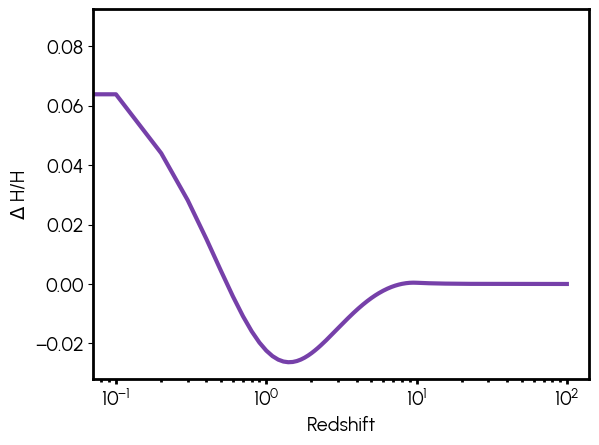

In [ ]:
Rate = result.x[1]
h = result.x[0] #kg/m^3

#Here I apply a cubic spline interpolation, useful for plotting things below.
import scipy
#Note that np.flip is used becuase the interpolator will throw an error if you feed it a list of z-values that goes from large numbers to small ones. 
Interpolated_H_No_Mergers=scipy.interpolate.CubicSpline(np.flip(zList_No_Mergers), np.flip(HList_No_Mergers), axis=0, extrapolate=None)
Interpolated_H_Mergers = WithMergers(h, Rate)[3]

zList=np.linspace(0, 100, 1000) #Redshifts between 0 and 100, for plotting 
zList=np.flip(zList)
deltaH_H = (Interpolated_H_Mergers(zList) - Interpolated_H_No_Mergers(zList))/Interpolated_H_No_Mergers(zList)
#This is the Hubble parameter with mergers minus the Hubble parameter in Lambda-CDM (no mergers) divided by H with no mergers.

#Plotting fractional change in H 
plt.plot(zList, deltaH_H, color=cmap(1), linewidth = 3)
plt.xlabel("Redshift")
plt.ylabel(r'$\Delta$ H/H')
plt.xscale("log")
plt.show()


H0 With Mergers: 
73.17590958261782


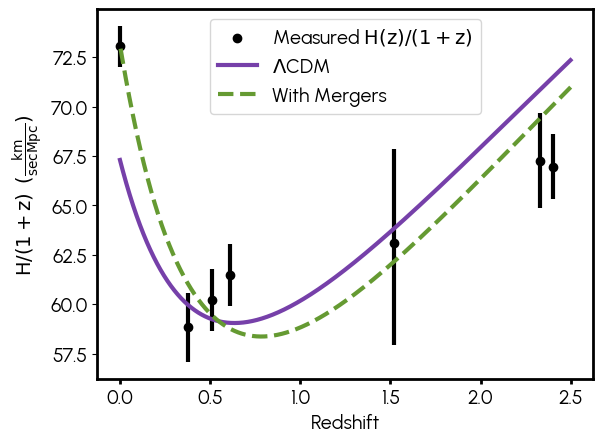

In [ ]:
Rate = result.x[1]
h = result.x[0] #kg/m^3
Interpolated_H_Mergers = WithMergers(h, Rate)[3]

zList=np.linspace(0, 2.5, 1000) #Redshifts between 0 and 2.5, for plotting 
zList=np.flip(zList)

H1pzList_Mergers = []
for index in range(len(zList)):
    z = zList[index]
    H1pzList_Mergers.append(Interpolated_H_Mergers(z)/(1+z)) #Dividing H by 1+z, useful for plots 

plt.scatter(H_Measured_Redshift, H_Measured_1pz, color='k', label=r'Measured $\rm{H}(z)/(1+z)$')
plt.vlines(x = H_Measured_Redshift, ymin = H_Measured_1pz - H_Measured_Uncertainty_Lower_1pz, ymax = H_Measured_1pz + H_Measured_Uncertainty_Upper_1pz, colors = 'black', linewidth = 3)
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1], color = cmap(1), linewidth = 3, label=r'$Λ$CDM')
plt.plot(zList, H1pzList_Mergers, color=cmap(6), linewidth = 3, linestyle ='dashed', label='With Mergers')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{H}/(1+z) \hspace{0.5} (\frac{km}{sec Mpc})$')
plt.legend()

H0 = WithMergers(h, Rate)[1]
print("H0 With Mergers: ")
print(H0) #km / (sec Mpc)


Text(0.5, 0, 'Redshift')

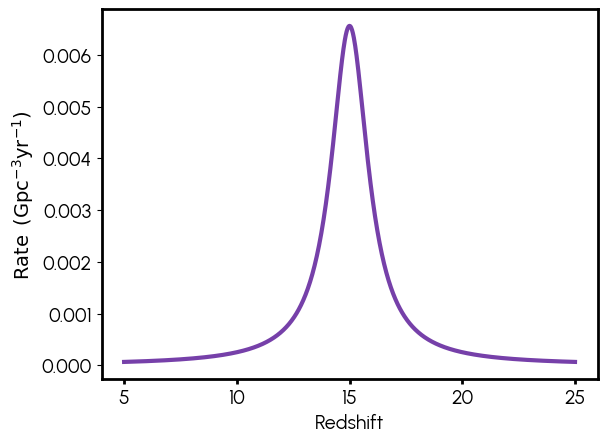

In [ ]:
#This plots the comoving SMBH formation rate for a case that produces 10^6 SMBHs per cubic Gpc at z = 0 
def SMBH_formation_rate(z, C):
    z_peak = 15 #Redshift the formation peaks at 
    rate = C / (1 + (z - z_peak)**2)
    return rate

z = np.linspace(5, 25, 1000)
plt.plot(z, SMBH_formation_rate(z, 0.00656), color=cmap(1), linewidth = 3)
plt.ylabel(r'$\rm{Rate} \hspace{0.5} (\rm{Gpc^{-3}} \rm{yr^{-1}})$')
plt.xlabel('Redshift') 

We know that if SMBHs form from PBH mergers, something like 99 percent of the initial mass goes to radiation, so the rate radiation is injected becomes: 100x(SMBH mass)x(Comoving SMBH Formation Rate)x $(1+z)^3$. We can then fit parameters in the formation rate model, then figure out the density of SMBHs that that implies for z = 0, and see if it is reasonable. 

In [ ]:

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

def SMBHFormationPBHs(h_sample, C):
    # Constants
    c = 299792458  # m/s
    G = 6.67430e-11  # m^3 kg^-1 s^-2
    MetersPerParsec = 3.086e16  # meters per parsec
    MetersPerMpc = 1e6 * MetersPerParsec  # meters per Mpc
    H0UnitConversion = 1000 / (MetersPerMpc)
    MetersPerGpc = (10**9)*MetersPerParsec
    SecondsperYear=365*24*60*60
    SMBHMass=(10**7) #Solar Masses
    KgperSolarMass = 1.989*(10**(30))
    SMBHMass = SMBHMass*KgperSolarMass #now in kg 
    
    #Comoving SMBH formation rate 
    def RSMBHComoving(z, C):
        z_peak = 15
        rate = C / (1 + (z - z_peak)**2)
        rate = rate*(1/MetersPerGpc**3)*(1/SecondsperYear) #Converting to m^-3 sec^-1 
        return rate*100 #Factor of 100 because 100x the final SMBH mass is converted to radiation if formed from PBH mergers 

    # Friedman Equation 
    def H(z, rho_m, rho_r, rho_Lambda):
        rho_total = rho_m + rho_r + rho_Lambda
        return math.sqrt((8*math.pi*G/3)*(rho_total))

    def RhoCritical(z, rho_m, rho_r, rho_Lambda):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return 3*Hval*Hval/(8*math.pi*G) 

    #Returns drho_r / dz
    #Note that the factor of 100 is within the RSMBHComoving function!
    def drhordz(z, rho_m, rho_r, rho_Lambda, C):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-4*Hval*rho_r + RSMBHComoving(z, C)*((1+z)**3)*SMBHMass)

    #Returns drho_m / dz 
    #Note that the factor of 100 is within the RSMBHComoving function!
    def drhomdz(z, rho_m, rho_r, rho_Lambda, C):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (1/(Hval*(1+z)))*(3*Hval*rho_m + RSMBHComoving(z, C)*((1+z)**3)*SMBHMass)
    
    rho_m, rho_r, rho_Lambda = InitialConditions(h_sample) #Finds densities at z = 1090 
    z = 1090 #Redshift at CMB formation 
    dz = -0.001
    n = 0
    HList_Mergers=[]
    zList_Mergers=[]
    #Euler's method, using it bc it is simple 
    while z>0:
        rho_r_old = rho_r
        rho_m_old = rho_m 

        #Here I am integrating to ultimately get the number density of SMBHs today 
        z_peak = 15
        ComovingSMBHFormationRate = (C / (1 + (z - z_peak)**2)) * (1/MetersPerGpc**3)*(1/SecondsperYear)
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        n = n + dz*(-1/(Hval*(1+z)))*ComovingSMBHFormationRate
        #Note : -1 / (H * (1+z)) gives dt/dz

        #Stuff below is to forbid negative rho_m
        if (rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, C)) > 0:
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, C)
            rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, C)
        else:
            rho_m = 0
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, 0)
        HList_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
        zList_Mergers.append(z)

        z = z + dz

    RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
    Omega_m=rho_m/RhoCrit
    Omega_r=rho_r/RhoCrit 
    H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion

    H1pzList_Mergers=[] #Diviving H by 1+z, because it is useful for plotting later. 
    for index in range(len(HList_Mergers)):
        H1pzList_Mergers.append(HList_Mergers[index]/(1+zList_Mergers[index]))

    #Here I apply a cubic spline interpolation, useful for plotting things below.
    import scipy
    Interpolated_H_Mergers=scipy.interpolate.CubicSpline(np.flip(zList_Mergers), np.flip(HList_Mergers), axis=0, extrapolate=None)

    return zList_Mergers, H0New, H1pzList_Mergers, Interpolated_H_Mergers, n

In [ ]:
#Returns chi^2, we minimize this in our fits. 
def ChiSqrPBH(h_sample, C):
    Output = SMBHFormationPBHs(h_sample, C)[3]
    H_With_Mergers = Output(H_Measured_Redshift)
    #This is to handle the two values for H that have slightly different upper and lower error bars. 
    H_Measured_Uncertainty = H_Measured_Uncertainty_Upper
    if Output(1.52) > 159:
        H_Measured_Uncertainty[4] = H_Measured_Uncertainty_Upper[4]
    else:
        H_Measured_Uncertainty[4] = H_Measured_Uncertainty_Lower[4]
    if Output(2.4) > 227.6:
        H_Measured_Uncertainty[6] = H_Measured_Uncertainty_Upper[6]
    else:
        H_Measured_Uncertainty[6] = H_Measured_Uncertainty_Lower[6]
    Chisquare = np.sum(((H_With_Mergers - H_Measured)**2) / H_Measured_Uncertainty**2)
    return Chisquare

In [ ]:
#This conducts a brute-force grid search, to set the initial values for the minimization algorithm. 
CList = np.linspace(0, 100, 100)
hList = np.linspace(0.5, 1, 20)

ChiSqrVal = 999999999
for element1 in CList:
    print(element1) #Prints progress so I can see it. Feel free to delete this line, if you wish. 
    for element2 in hList:
        ChiSqrValNew = ChiSqrPBH(element2, element1)
        if ChiSqrValNew < ChiSqrVal:
            ChiSqrVal = ChiSqrValNew
            hfitted = element2
            Cfitted = element1 

0.0
1.0101010101010102
2.0202020202020203
3.0303030303030303
4.040404040404041
5.050505050505051
6.0606060606060606
7.070707070707071
8.080808080808081
9.090909090909092
10.101010101010102
11.111111111111112
12.121212121212121
13.131313131313131
14.141414141414142
15.151515151515152
16.161616161616163
17.171717171717173
18.181818181818183
19.191919191919194
20.202020202020204
21.212121212121215
22.222222222222225
23.232323232323235
24.242424242424242
25.252525252525253
26.262626262626263
27.272727272727273
28.282828282828284
29.292929292929294
30.303030303030305
31.313131313131315
32.323232323232325
33.333333333333336
34.343434343434346
35.35353535353536
36.36363636363637
37.37373737373738
38.38383838383839
39.3939393939394
40.40404040404041
41.41414141414142
42.42424242424243
43.43434343434344
44.44444444444445
45.45454545454546
46.46464646464647
47.47474747474748
48.484848484848484
49.494949494949495
50.505050505050505
51.515151515151516
52.525252525252526
53.535353535353536
54.54545

In [ ]:
from scipy.optimize import minimize

# Wrap ChiSqr to accept a single list of parameters
def ChiSqr_wrapped_PBH(params):
    h_sample, C = params
    return ChiSqrPBH(h_sample, C)

params1 = (0.68, 0)
print('Chi Squared for ΛCDM: ')
print(ChiSqr_wrapped_PBH(params1))
print(" ")

# Initial guesses for [h, C]
initial_guess = [hfitted, Cfitted]

#Add bounds
bounds = [(0.5, 1), (0.0, 10000/1.57)]

# Run minimization
resultPBH = scipy.optimize.minimize(ChiSqr_wrapped_PBH, initial_guess, bounds=bounds)

# Print results
print("Best-Fit Parameters:")
print("h = ", resultPBH.x[0])
print("C, Units : per (Gpc^3 yr) = ", resultPBH.x[1])
print("Minimum Chi-square: ", resultPBH.fun)

print("H0 (km/(s*Mpc)) : ")
print(SMBHFormationPBHs(resultPBH.x[0], resultPBH.x[1])[1])

Chi Squared for ΛCDM: 
37.285474087972595
 
Best-Fit Parameters:
h =  0.7498464901431997
C, Units : per (Gpc^3 yr) =  74.74226354036362
Minimum Chi-square:  5.080524793333137
H0 (km/(s*Mpc)) : 
72.9308215972171


h: 
0.7498464901431997
Omega_m: 
0.2532770041002717
 
Loeb, Koushiappas, etc Found for Decaying DM: 
h = 0.7, Omega_DM = 0.24


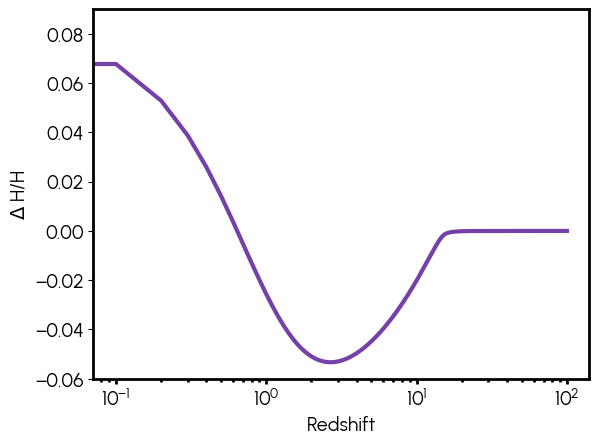

In [ ]:
hPBH = resultPBH.x[0]
C = resultPBH.x[1]
Omega_mPBH = 0.14241/hPBH**2
print("h: ")
print(hPBH)
print("Omega_m: ")
print(Omega_mPBH)
print(" ")
print("Loeb, Koushiappas, etc Found for Decaying DM: ")
print("h = 0.7, Omega_DM = 0.24")

#Here I apply a cubic spline interpolation, useful for plotting things below.
import scipy
#Note that np.flip is used becuase the interpolator will throw an error if you feed it a list of z-values that goes from large numbers to small ones. 
Interpolated_H_No_Mergers=scipy.interpolate.CubicSpline(np.flip(zList_No_Mergers), np.flip(HList_No_Mergers), axis=0, extrapolate=None)
Interpolated_H_PBH = SMBHFormationPBHs(hPBH, C)[3]

zList=np.linspace(0, 100, 1000) #Redshifts between 0 and 100, for plotting 
zList=np.flip(zList)
deltaH_H_PBH = (Interpolated_H_PBH(zList) - Interpolated_H_No_Mergers(zList))/Interpolated_H_No_Mergers(zList)

#Plotting fractional change in H 
plt.plot(zList, deltaH_H_PBH, color=cmap(1), linewidth = 3)
plt.xlabel("Redshift")
plt.ylabel(r'$\Delta$ H/H')
plt.xscale("log")
plt.show()


H0 With SMBH Formation From PBHs: 
72.9308215972171


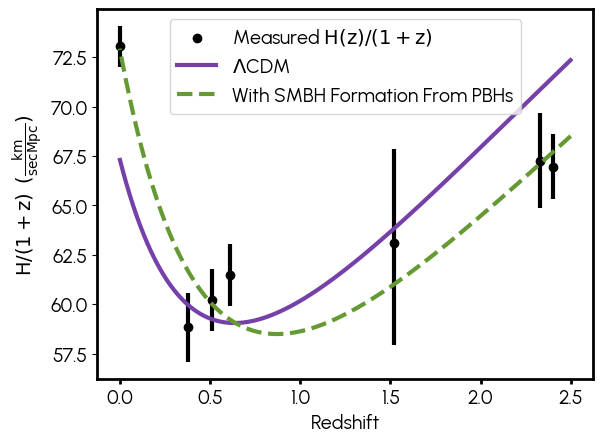

In [ ]:
hPBH = resultPBH.x[0]
C = resultPBH.x[1]

Interpolated_H_PBH = SMBHFormationPBHs(hPBH, C)[3]

zList=np.linspace(0, 2.5, 1000) #Redshifts between 0 and 2.5, for plotting 
zList=np.flip(zList)

H1pzList_PBH = [] #Dividing H by 1+z, because it is useful for plotting.
for index in range(len(zList)):
    z = zList[index]
    H1pzList_PBH.append(Interpolated_H_PBH(z)/(1+z))

plt.scatter(H_Measured_Redshift, H_Measured_1pz, color='k', label=r'Measured $\rm{H}(z)/(1+z)$')
plt.vlines(x = H_Measured_Redshift, ymin = H_Measured_1pz - H_Measured_Uncertainty_Lower_1pz, ymax = H_Measured_1pz + H_Measured_Uncertainty_Upper_1pz, colors = 'black', linewidth = 3)
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1], color = cmap(1), linewidth = 3, label=r'$Λ$CDM')
plt.plot(zList, H1pzList_PBH, color=cmap(6), linewidth = 3, linestyle ='dashed', label='With SMBH Formation From PBHs')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{H}/(1+z) \hspace{0.5} (\frac{km}{sec Mpc})$')
plt.legend()

H0PBH = SMBHFormationPBHs(hPBH, C)[1]
print("H0 With SMBH Formation From PBHs: ")
print(H0PBH) #km / (sec Mpc)


$NumberDensitySMBHs = \int_{1090}^0 ComovingSMBHFormationRate (\frac{-1}{(1+z)H}) dz$

In [24]:
hPBH = resultPBH.x[0]
C = resultPBH.x[1]
NumberDensitySMBHs = (SMBHFormationPBHs(hPBH, C)[4])*(MetersPerGpc**3) #Converted to per cubic Gpc, instead of per cubic meter.
print("Number Density of 10^7 Solar Mass SMBHs / 10^6, per cubic Gpc, at z = 0: ")
print(NumberDensitySMBHs/(10**6))
print(" ")
print("This is of order 10^10 SMBHs per cubic Gpc at z = 0, whereas we would expect something 10,000 x smaller for our Universe.")
print("SMBH formation from PBHs is likely insufficient to alleviate the Hubble tension, as we need to form too many SMBHs to alleviate it.")

Number Density of 10^7 Solar Mass SMBHs / 10^6, per cubic Gpc, at z = 0: 
11431.19792508889
 
This is of order 10^10 SMBHs per cubic Gpc at z = 0, whereas we would expect something 10,000 x smaller for our Universe.
SMBH formation from PBHs is likely insufficient to alleviate the Hubble tension, as we need to form too many SMBHs to alleviate it.


In [ ]:

import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18 as cosmo

def WithSolarMergers(h_sample, Rate):
    # Constants
    c = 299792458  # m/s
    G = 6.67430e-11  # m^3 kg^-1 s^-2
    MetersPerParsec = 3.086e16  # meters per parsec
    MetersPerMpc = 1e6 * MetersPerParsec  # meters per Mpc
    H0UnitConversion = 1000 / (MetersPerMpc)
    MetersPerGpc = (10**9)*MetersPerParsec
    SecondsperYear=365*24*60*60
    BHBinaryMass=2*30 #Solar Masses
    KgperSolarMass = 1.989*(10**(30))
    BHBinaryMass = BHBinaryMass*KgperSolarMass #now in kg 
    Epsilon = 0.08 #Fraction of mass converted to gravitational waves 

    #This is a simple step function merger rate that starts at redshift = 15
    def RBHComoving(z, Rate):
        Rate = Rate*(10**7)/30 #Scaling the value passed to the function. (Doing it this way is convenient.)
        if z>15:
            return 0
        else:
            return Rate*(1/MetersPerGpc**3)*(1/SecondsperYear) #Converting to m^-3 sec^-1 

    # Friedman Equation 
    def H(z, rho_m, rho_r, rho_Lambda):
        rho_total = rho_m + rho_r + rho_Lambda
        return math.sqrt((8*math.pi*G/3)*(rho_total))

    def RhoCritical(z, rho_m, rho_r, rho_Lambda):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return 3*Hval*Hval/(8*math.pi*G) 

    #Returns drho_r / dz 
    def drhordz(z, rho_m, rho_r, rho_Lambda, Rate):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (-1/(Hval*(1+z)))*(-4*Hval*rho_r + RBHComoving(z, Rate)*((1+z)**3)*Epsilon*BHBinaryMass)

    #Returns drho_m / dz 
    def drhomdz(z, rho_m, rho_r, rho_Lambda, Rate):
        Hval=H(z, rho_m, rho_r, rho_Lambda)
        return (1/(Hval*(1+z)))*(3*Hval*rho_m + RBHComoving(z, Rate)*((1+z)**3)*Epsilon*BHBinaryMass)
    
    rho_m, rho_r, rho_Lambda = InitialConditions(h_sample) #Sets initial conditions at z = 1090 
    z = 1090 #Redshift at CMB formation 
    dz = -0.001
    HList_Mergers=[]
    zList_Mergers=[]
    #Euler's method, using it bc it is simple 
    while z>0:
        rho_r_old = rho_r
        rho_m_old = rho_m 
        #Stuff below is to forbid negative rho_m
        if (rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)) > 0:
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)
            rho_m = rho_m + dz*drhomdz(z, rho_m_old, rho_r_old, rho_Lambda, Rate)
        else:
            rho_m = 0
            rho_r = rho_r + dz*drhordz(z, rho_m_old, rho_r_old, rho_Lambda, 0)
        HList_Mergers.append(H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion)
        zList_Mergers.append(z)
        z = z + dz

    RhoCrit=RhoCritical(z, rho_m, rho_r, rho_Lambda)
    Omega_m=rho_m/RhoCrit
    Omega_r=rho_r/RhoCrit 
   
    H0New = H(z, rho_m, rho_r, rho_Lambda)/H0UnitConversion
   
    H1pzList_Mergers=[] #H divided by 1+z, useful for plotting 
    for index in range(len(HList_Mergers)):
        H1pzList_Mergers.append(HList_Mergers[index]/(1+zList_Mergers[index]))

    #Here I apply a cubic spline interpolation, useful for plotting things.
    import scipy
    Interpolated_H=scipy.interpolate.CubicSpline(np.flip(zList_Mergers), np.flip(HList_Mergers), axis=0, extrapolate=None)

    return zList_Mergers, H0New, H1pzList_Mergers, Interpolated_H

In [ ]:
#Returns chi^2, we minimize this in fits 
def ChiSqrSolar(h_sample, Rate):
    Output = WithSolarMergers(h_sample, Rate)[3]
    H_With_Mergers = Output(H_Measured_Redshift)
    #This is to handle the two values for H that have slightly different upper and lower error bars. 
    H_Measured_Uncertainty = H_Measured_Uncertainty_Upper
    if Output(1.52) > 159:
        H_Measured_Uncertainty[4] = H_Measured_Uncertainty_Upper[4]
    else:
        H_Measured_Uncertainty[4] = H_Measured_Uncertainty_Lower[4]
    if Output(2.4) > 227.6:
        H_Measured_Uncertainty[6] = H_Measured_Uncertainty_Upper[6]
    else:
        H_Measured_Uncertainty[6] = H_Measured_Uncertainty_Lower[6]
    Chisquare = np.sum(((H_With_Mergers - H_Measured)**2) / H_Measured_Uncertainty**2)
    return Chisquare

In [ ]:
#Brute force grid search, sets initial values for minimization algorithm. 

RateList = np.linspace(0, 10000, 100)
hList = np.linspace(0.5, 1, 20)

ChiSqrVal = 999999999
for element1 in RateList:
    print(element1) #Prints progress, feel free to delete this line, if you wish. 
    for element2 in hList:
        ChiSqrValNew = ChiSqrSolar(element2, element1)
        if ChiSqrValNew < ChiSqrVal:
            ChiSqrVal = ChiSqrValNew
            hfittedSolar = element2
            RatefittedSolar = element1 

0.0
101.01010101010101
202.02020202020202
303.030303030303
404.04040404040404
505.0505050505051
606.060606060606
707.070707070707
808.0808080808081
909.0909090909091
1010.1010101010102
1111.111111111111
1212.121212121212
1313.1313131313132
1414.141414141414
1515.1515151515152
1616.1616161616162
1717.171717171717
1818.1818181818182
1919.1919191919192
2020.2020202020203
2121.212121212121
2222.222222222222
2323.2323232323233
2424.242424242424
2525.252525252525
2626.2626262626263
2727.2727272727275
2828.282828282828
2929.2929292929293
3030.3030303030305
3131.313131313131
3232.3232323232323
3333.3333333333335
3434.343434343434
3535.3535353535353
3636.3636363636365
3737.373737373737
3838.3838383838383
3939.3939393939395
4040.4040404040406
4141.414141414141
4242.424242424242
4343.434343434344
4444.444444444444
4545.454545454545
4646.464646464647
4747.474747474747
4848.484848484848
4949.49494949495
5050.50505050505
5151.515151515152
5252.525252525253
5353.535353535353
5454.545454545455
5555.55

In [ ]:
from scipy.optimize import minimize
import scipy 

# Wrap ChiSqr to accept a single list of parameters
def ChiSqr_wrapped(params):
    h_sample, Rate = params
    return ChiSqrSolar(h_sample, Rate)

params1 = (0.68, 0)
print('Chi Squared for ΛCDM: ')
print(ChiSqr_wrapped(params1))
print(" ")

# Initial guesses for [h, Rate]
initial_guess = [hfittedSolar, RatefittedSolar] 

#Add bounds
bounds = [(0.5, 1), (0.0, 10000)]

# Run minimization
result = scipy.optimize.minimize(ChiSqr_wrapped, initial_guess, bounds=bounds)

# Print results
print("Best-Fit Parameters With Mergers:")
print("h = ", result.x[0])
print("Merger Rate per (Gpc^3 yr) = ", result.x[1]*((10**7)/30))
print("Minimum Chi-square: ", result.fun)

print("H0 (km/(s*Mpc)) : ")
print(WithSolarMergers(result.x[0], result.x[1])[1])

Chi Squared for ΛCDM: 
37.285474087972595
 
Best-Fit Parameters With Mergers:
h =  0.7818073767799769
Merger Rate per (Gpc^3 yr) =  757441584.926009
Minimum Chi-square:  8.494556386623826
H0 (km/(s*Mpc)) : 
73.17693800400973


In [30]:
h = result.x[0]
Omega_m = 0.14241/h**2
print("h: ")
print(h)
print("Omega_m: ")
print(Omega_m)
print(" ")
print("Loeb, Koushiappas, etc Found for Decaying DM: ")
print("h = 0.7, Omega_DM = 0.24")

h: 
0.7818073767799769
Omega_m: 
0.2329919727593379
 
Loeb, Koushiappas, etc Found for Decaying DM: 
h = 0.7, Omega_DM = 0.24


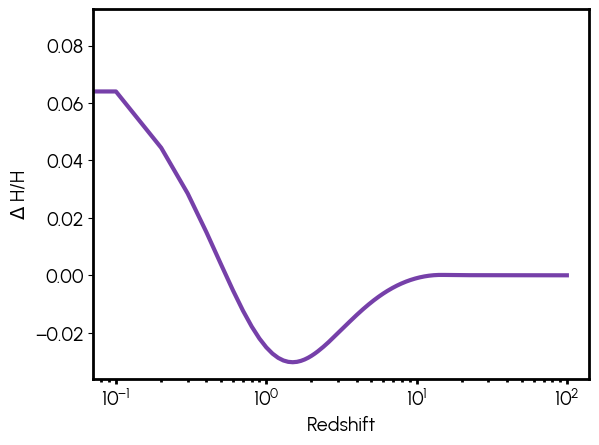

In [ ]:
Rate = result.x[1]
h = result.x[0] #kg/m^3

#Here I apply a cubic spline interpolation, useful for plotting things below.
import scipy
#Note that np.flip is used becuase the interpolator will throw an error if you feed it a list of z-values that goes from large numbers to small ones. 
Interpolated_H_No_Mergers=scipy.interpolate.CubicSpline(np.flip(zList_No_Mergers), np.flip(HList_No_Mergers), axis=0, extrapolate=None)
Interpolated_H_Mergers = WithSolarMergers(h, Rate)[3]

zList=np.linspace(0, 100, 1000) #Redshifts between 0 and 100, for plotting 
zList=np.flip(zList)
deltaH_H = (Interpolated_H_Mergers(zList) - Interpolated_H_No_Mergers(zList))/Interpolated_H_No_Mergers(zList)
#This is the Hubble parameter with mergers minus the Hubble parameter in Lambda-CDM (no mergers) divided by H with no mergers.

#Plotting fractional change in H for comparison against a plot in the paper. 
plt.plot(zList, deltaH_H, color=cmap(1), linewidth = 3)
plt.xlabel("Redshift")
plt.ylabel(r'$\Delta$ H/H')
plt.xscale("log")
plt.show()


H0 With Mergers: 
73.17693800400973


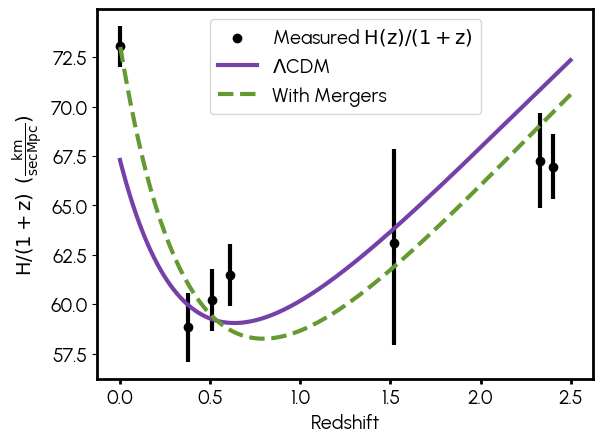

In [ ]:
Rate = result.x[1]
h = result.x[0] #kg/m^3
Interpolated_H_Mergers = WithSolarMergers(h, Rate)[3]

zList=np.linspace(0, 2.5, 1000) #Redshifts between 0 and 2.5, for plotting 
zList=np.flip(zList)

H1pzList_Mergers = [] #Dividing H by 1+z, useful for plotting. 
for index in range(len(zList)):
    z = zList[index]
    H1pzList_Mergers.append(Interpolated_H_Mergers(z)/(1+z))

plt.scatter(H_Measured_Redshift, H_Measured_1pz, color='k', label=r'Measured $\rm{H}(z)/(1+z)$')
plt.vlines(x = H_Measured_Redshift, ymin = H_Measured_1pz - H_Measured_Uncertainty_Lower_1pz, ymax = H_Measured_1pz + H_Measured_Uncertainty_Upper_1pz, colors = 'black', linewidth = 3)
plt.plot(zList_No_Mergers[-2500:-1], H1pzList_No_Mergers[-2500:-1], color = cmap(1), linewidth = 3, label=r'$Λ$CDM')
plt.plot(zList, H1pzList_Mergers, color=cmap(6), linewidth = 3, linestyle ='dashed', label='With Mergers')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{H}/(1+z) \hspace{0.5} (\frac{km}{sec Mpc})$')
plt.legend()

H0 = WithSolarMergers(h, Rate)[1]
print("H0 With Mergers: ")
print(H0) #km / (sec Mpc)